### Example experiments showing utility tradeoffs with randomization when claims are known

In [27]:
from claims_known import experiment
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd

### Full BF Lottery: Expected Utility vs Selection Rate

In [ ]:
e = experiment("uniform")
res1 = e.full_bf_utility_vs_selection()

e = experiment("normal", 0.5, 0.15)
res2 = e.full_bf_utility_vs_selection()

e = experiment("inv_normal", 0.5, 0.15)
res3 = e.full_bf_utility_vs_selection()

e = experiment("pareto", 2, 1)
res4 = e.full_bf_utility_vs_selection()

e = experiment("inv_pareto", 2, 1)
res5 = e.full_bf_utility_vs_selection()

In [ ]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['util_diff'], color="#2ca02c", label="Uniform")
plt.plot(res2["selection_rate"], res2['util_diff'], color="#1f77b4", label="Normal")
plt.plot(res3["selection_rate"], res3['util_diff'], color="#9467bd", label="Inv. Normal")
plt.plot(res4["selection_rate"], res4['util_diff'], color="#d62728", label="Pareto")
plt.plot(res5["selection_rate"], res5['util_diff'], color="#ff7f0e", label="Inv. Pareto")

plt.xlim([0,0.5])
plt.ylim([0,0.5])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [2]:
e = experiment("normal", 0.5, 0.10)
#e = experiment("inv_pareto", 1, 1)
res1 = e.full_bf_utility_vs_selection()

e = experiment("normal", 0.5, 0.15)
#e = experiment("inv_pareto", 2, 1)
res2 = e.full_bf_utility_vs_selection()

e = experiment("normal", 0.5, 0.20)
#e = experiment("inv_pareto", 3, 1)
res3 = e.full_bf_utility_vs_selection()

100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.42it/s]


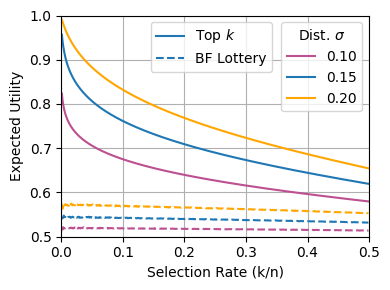

In [26]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['determ_util'], color="#bc5090")
plt.plot(res2["selection_rate"], res2['determ_util'], color="#1f77b4", label="Top $k$")
plt.plot(res3["selection_rate"], res3['determ_util'], color="#ffa600")

plt.plot(res1["selection_rate"], res1['random_util'], linestyle="dashed", color="#bc5090")
plt.plot(res2["selection_rate"], res2['random_util'], linestyle="dashed", color="#1f77b4", label="BF Lottery")
plt.plot(res3["selection_rate"], res3['random_util'], linestyle="dashed", color="#ffa600")

plt.xlim([0,0.5])
plt.ylim([0.5,1.0])
plt.ylabel("Expected Utility")
plt.xlabel("Selection Rate (k/n)")

blue_line = mlines.Line2D([], [], color='#bc5090', linestyle="-", label="0.10")
blue_line2 = mlines.Line2D([], [], color='#1f77b4', linestyle="-", label="0.15")
blue_line3 = mlines.Line2D([], [], color='#ffa600', linestyle="-", label="0.20")

first_legend = plt.legend(handles=[blue_line, blue_line2, blue_line3], title="Dist. $\\sigma$", loc="upper right")
ax = plt.gca().add_artist(first_legend)

plt.legend(loc=(0.29,0.745))
#plt.legend(title="Distribution $\\alpha$")
plt.grid()
plt.tight_layout()
plt.savefig('normal_full_bf.jpg', format='jpg', dpi=500)
plt.show() 

### Partial BF Lottery: Expected Utility vs Selection Rate

In [28]:
e = experiment("normal", 0.5, 0.15)
normal_full = e.full_bf_utility_vs_selection()
normal_partial = e.partial_bf_utility_vs_selection(0.5)

e = experiment("inv_pareto", 2, 1)
pareto_full = e.full_bf_utility_vs_selection()
pareto_partial = e.partial_bf_utility_vs_selection(0.5)

100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.90it/s]


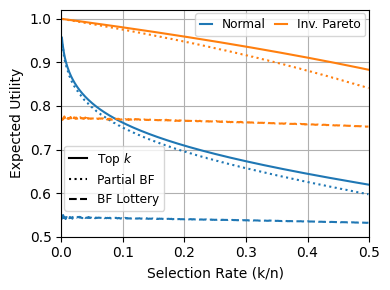

In [80]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(normal_full["selection_rate"], normal_full['determ_util'], linestyle="-", color="#1f77b4")
plt.plot(normal_full["selection_rate"], normal_full['random_util'], linestyle="dashed", color="#1f77b4")
plt.plot(normal_partial["selection_rate"], normal_partial['random_util'], linestyle="dotted", color="#1f77b4")

plt.plot(pareto_full["selection_rate"], pareto_full['determ_util'], linestyle="-", color="#ff7f0e")
plt.plot(pareto_full["selection_rate"], pareto_full['random_util'], linestyle="dashed", color="#ff7f0e")
plt.plot(pareto_partial["selection_rate"], pareto_partial['random_util'], linestyle="dotted", color="#ff7f0e")


plt.xlim([0,0.5])
plt.ylim([0.5, 1.02])
plt.ylabel("Expected Utility")
plt.xlabel("Selection Rate (k/n)")

blue_line = mlines.Line2D([], [], color='k', linestyle="-", label="Top $k$")
blue_line2 = mlines.Line2D([], [], color='k', linestyle="dashed", label="BF Lottery")
blue_line3 = mlines.Line2D([], [], color='k', linestyle="dotted", label="Partial BF")

first_legend = plt.legend(handles=[blue_line, blue_line3, blue_line2], handlelength=1.5, loc=(0.01, 0.115), fontsize=8.75)
ax = plt.gca().add_artist(first_legend)

blue_line = mlines.Line2D([], [], color='#1f77b4', label="Normal")
blue_line2 = mlines.Line2D([], [], color='#ff7f0e', label="Inv. Pareto")

plt.legend(handles=[blue_line, blue_line2], loc=(0.435, 0.885), ncol=2, handlelength=1, fontsize=8.75,columnspacing=0.75)


plt.grid()
plt.tight_layout()
plt.savefig('1_utility.jpg', format='jpg', dpi=500)
plt.show()

In [ ]:
e = experiment("uniform")
res1 = e.partial_bf_utility_vs_selection(0.25)
res2 = e.partial_bf_utility_vs_selection(0.5)
res3 = e.partial_bf_utility_vs_selection(0.75)

In [ ]:
plt.rcParams["figure.figsize"] = [4,3]
fig, ax = plt.subplots()

plt.plot(res1["selection_rate"], res1['util_diff'], color="#1f77b4", linestyle="-.", label="0.25$\\cdot$k")
plt.plot(res2["selection_rate"], res2['util_diff'], color="#1f77b4", linestyle="--", label="0.50$\\cdot$k")
plt.plot(res3["selection_rate"], res3['util_diff'], color="#1f77b4", linestyle=":", label="0.75$\\cdot$k")

plt.xlim([0,0.5])
plt.ylim([0,0.115])
plt.ylabel("Difference in Expected Utility")
plt.xlabel("Selection Rate (k/n)")

plt.legend(title="$U$", loc="upper left")
ax.text(0.39, 0.95, "$L=n-2k+U$", transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor="white", edgecolor="0.8"))

plt.grid()
plt.tight_layout()
plt.show()

### Partial BF Lottery: Expected Utility vs Randomization Rate

In [24]:
from claims_known import experiment
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

e = experiment("uniform")
res = e.partial_bf_randomization_rate(0.5)
#res2 = e.partial_bf_randomization_rate(0.25)
#res3 = e.partial_bf_randomization_rate(0.5)

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 183.27it/s]


In [57]:
res = res[["perc_random_k", "perc_random_n", "util_diff"]]
util_diff = []
for perc_random_n in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    inner = []
    for perc_random_k in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        val = res.loc[(res["perc_random_k"]==perc_random_k)&(res["perc_random_n"]==perc_random_n), "util_diff"].to_numpy()
        if len(val)>0:
            inner.append(np.abs(val[0]))
        else:
            inner.append(np.nan)
    util_diff.append(inner)

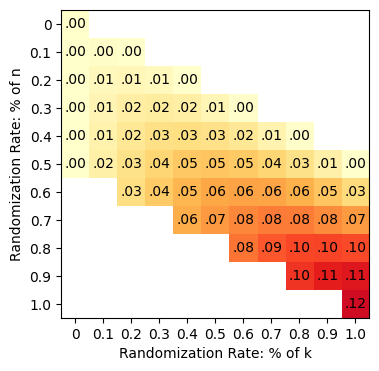

In [58]:
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots()

plt.imshow(util_diff, cmap='YlOrRd', vmin=0, vmax=0.15, interpolation='nearest')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xlabel('Randomization Rate: % of k')
ax.set_ylabel('Randomization Rate: % of n')

for (j,i),label in np.ndenumerate(util_diff):
    if pd.notna(label):        
        ax.text(i,j,"{:.2f}".format(label)[1:],ha='center',va='center')
    
plt.show()